# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?


## Question 0

Make a prediction.

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

When looking at the volume of sp500 I believe the first digit will be 1 between 20 - 30% of the time, and 9 will be less than 10%. This is because as the number round to 100, 1000, 10000, etc. they will become "harder" to round up again requiring more units to increase from 100 to 1000. This will result in a distribution that favors lower numbers 1-4, compared to higher numbers 6-10. I assume the last digit will be nearly completely random with a uniform distribution across the digits 1 - 9. I predict there will be some level of variability but it should be mostly constant each making up around 11.11% of the total with + or - 2% variability.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file `sp500.csv` contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [25]:
# ENTER YOUR CODE HERE.
import pandas as pd
df = pd.read_csv("sp500.csv")
df.head()

df.set_index("Name")
df

,date,Name,open,close,volume
0,2018-02-01,AAL,$54.00,$53.88,3623078
1,2018-02-01,AAPL,$167.16,$167.78,47230787
2,2018-02-01,AAP,$116.24,$117.29,760629
3,2018-02-01,ABBV,$112.24,$116.34,9943452
4,2018-02-01,ABC,$97.74,$99.29,2786798
...,...,...,...,...,...
500,2018-02-01,XYL,$72.50,$74.84,1817612
501,2018-02-01,YUM,$84.24,$83.98,1685275
502,2018-02-01,ZBH,$126.35,$128.19,1756300
503,2018-02-01,ZION,$53.79,$54.98,3542047


The unit of observation is the company being observed in the study, as each entry has a unique company and its financial information. The name seems to be the optimal index as it is unique to each company and will not have repeated data when compared to other entries.

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

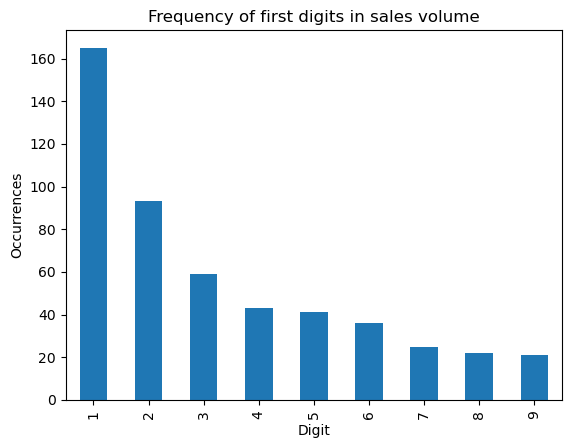

In [8]:
# ENTER YOUR CODE HERE.
import matplotlib.pyplot as plt
%matplotlib inline

df['volume'] = df['volume'].astype(str)
volume_dig = df['volume'].str[0]
volume_dig_count = volume_dig.value_counts()

volume_dig_count.plot.bar()
plt.xlabel('Digit')
plt.ylabel('Occurrences')
plt.title('Frequency of first digits in sales volume')
plt.show()

The result from the graph was similar to my assumption, however the occurrences definitely exceeded my expectations. I also assumed that there would not be as steep of a decrease following one with numbers past 3 starting to level out. I assumed it would decrease at a steady rate to 9 but this was not the case. Instead, the graph shows an exponential increase of occurrence as the values approach 9 from 1.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

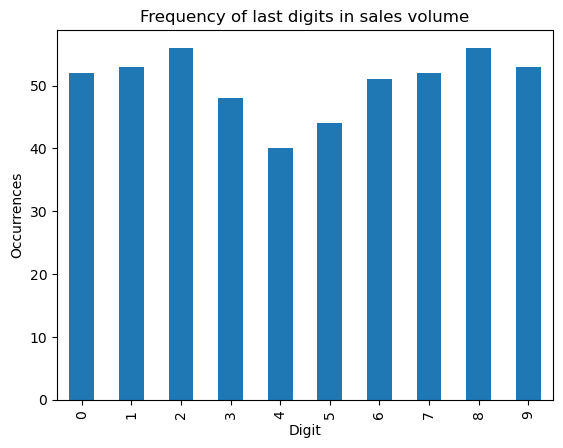

In [11]:
# ENTER YOUR CODE HERE.
df['volume'] = df['volume'].astype(str)
volume_dig = df['volume'].str[-1]
volume_dig_count = volume_dig.value_counts()
volume_dig_count = volume_dig_count.sort_index()
volume_dig_count.plot.bar()
plt.xlabel('Digit')
plt.ylabel('Occurrences')
plt.title('Frequency of last digits in sales volume')
plt.show()

The graph was mostly consistent with my hypothesis, the occurrences are  constant with the exception of 3, 4, 5 being relatively lower compared to other values. I am not sure if this is simply due to varability in the data or because the last digit is likely to be closer to the beginning and end digits.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

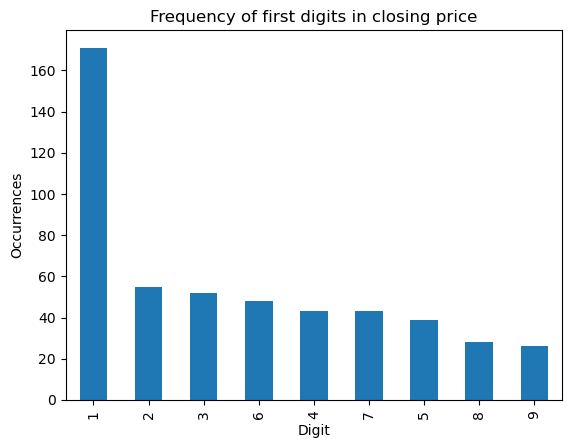

In [14]:
# ENTER YOUR CODE HERE.
import matplotlib.pyplot as plt
%matplotlib inline
df['close'] = df['close'].astype(str)
close_dig = df['close'].str[1]
close_dig_count = close_dig.value_counts()

close_dig_count.plot.bar()
plt.xlabel('Digit')
plt.ylabel('Occurrences')
plt.title('Frequency of first digits in closing price')
plt.show()

Similar to question #2 there is a high amount of occurrences of digit 1 with significantly fewer occurances of digit 2 - 9. Unlike question 2 there is a larger jump from 1 to 2 and a following consistent decrease. I am curious what factors affect if the digits following 2 have steeper or flatter results.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. This quarter, you don't need to demo Lab 1. The first lab to demo will be Lab 2.

2. Upload your .ipyn Notebook to Canvas and pdf to Gradescope.